### **STAT6309: Final Project; Delaney Helgeson**

### I chose the Secondary Mushroom Dataset from the UCI Machine Learning Repository. The dataset has 61,069 observations and 21 attributes. There are 17 categorical attributes and 3 quantitative attributes. The data contains missing values in two columns. I am interested in this data set because it would be a fun opportunity to apply my statistics knowledge within the context of biology/ecology. I also like this dataset because it has a lot of observations and potential for a wide range of analyses. My goal for this dataset would be to explore methods for predicting whether the mushroom is edible or poisonous, perhaps via Logistic Regression and/or Decision trees. 

Source: https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering

In [9]:
mushroom = pd.read_csv("secondary_data.csv", sep=';')

In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [156]:
# Check levels in the dataset
for column in mushroom.columns:
    print(column, ": ", pd.unique(mushroom[column]))

class :  ['p' 'e']
cap-diameter :  [15.26 16.6  14.07 ... 22.85 21.8  20.42]
cap-shape :  ['x' 'f' 'p' 'b' 'c' 's' 'o']
cap-surface :  ['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
cap-color :  ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
does-bruise-or-bleed :  ['f' 't']
gill-attachment :  ['e' nan 'a' 'd' 's' 'x' 'p' 'f']
gill-spacing :  [nan 'c' 'd' 'f']
gill-color :  ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
stem-height :  [16.95 17.99 17.8  ...  1.23  1.16  0.  ]
stem-width :  [17.09 18.19 17.74 ... 32.59 30.99 30.51]
stem-root :  ['s' nan 'b' 'r' 'c' 'f']
stem-surface :  ['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
stem-color :  ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
veil-type :  ['u' nan]
veil-color :  ['w' 'y' nan 'n' 'e' 'u' 'k']
has-ring :  ['t' 'f']
ring-type :  ['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']
spore-print-color :  [nan 'w' 'p' 'k' 'r' 'u' 'n' 'g']
habitat :  ['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
season :  ['w' 'u' 'a' 's']


In [10]:
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [157]:
# See percentage missing for each column that contains missing values
columns_nan = ['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 
              'ring-type', 'spore-print-color']

for column in columns_nan:
    print(column, ": ", len(np.array(np.where(pd.isnull(mushroom[column])))[0])*100 /  mushroom.shape[0] )

cap-surface :  23.121387283236995
gill-attachment :  16.184971098265898
gill-spacing :  41.040462427745666
stem-root :  84.39306358381504
stem-surface :  62.42774566473989
veil-type :  94.79768786127168
veil-color :  87.86127167630057
ring-type :  4.046242774566474
spore-print-color :  89.59537572254335


In [99]:
# Drop columns with more than 80% missing values. 
mushroom2 = mushroom.drop(['stem-root','veil-type', 'veil-color','spore-print-color'], axis=1)

# Isolate categorical variables for encoding
mushroom2_cat = mushroom2.select_dtypes(include=[object])

# Encode categorical variables
mushroom2_encoded = mushroom2_cat.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index))

# Join with numeric variables
mushroom2_total = pd.concat((mushroom2.select_dtypes(include=['float64']), mushroom2_encoded), axis=1)

## Distribution of Levels before Imputation

<AxesSubplot:xlabel='season', ylabel='count'>

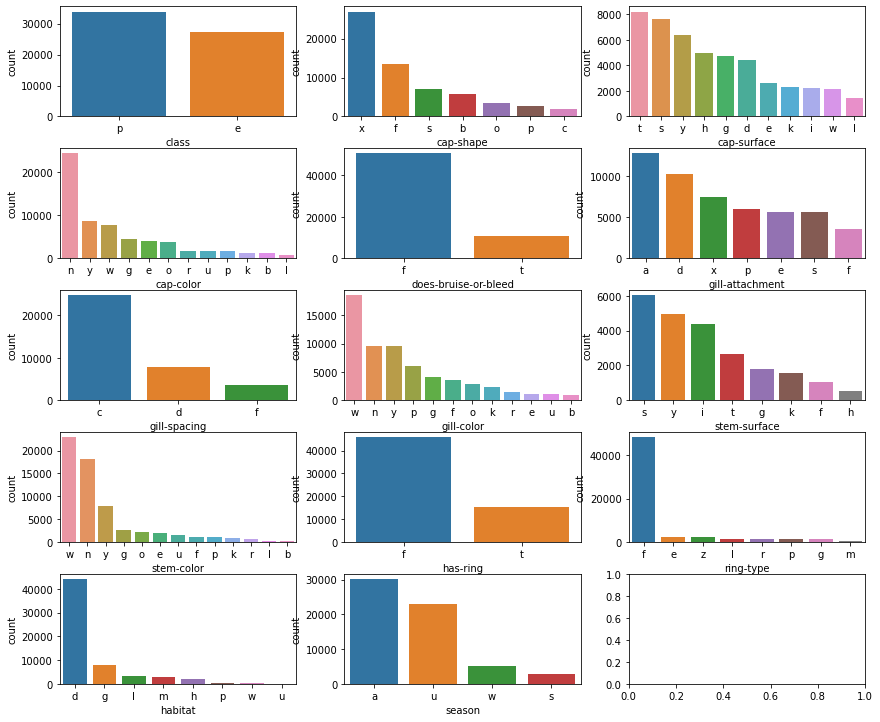

In [145]:
fig, axes = plt.subplots(5, 3, figsize=(12,10))
fig.tight_layout()

#create chart in each subplot
sns.countplot(data=mushroom2, x='class', order=mushroom2['class'].value_counts().index, ax=axes[0,0])
sns.countplot(data=mushroom2, x='cap-shape', order=mushroom2['cap-shape'].value_counts().index, ax=axes[0,1])
sns.countplot(data=mushroom2, x='cap-surface', order=mushroom2['cap-surface'].value_counts().index, ax=axes[0,2])
sns.countplot(data=mushroom2, x='cap-color', order=mushroom2['cap-color'].value_counts().index, ax=axes[1,0])
sns.countplot(data=mushroom2, x='does-bruise-or-bleed', order=mushroom2['does-bruise-or-bleed'].value_counts().index, ax=axes[1,1])
sns.countplot(data=mushroom2, x='gill-attachment', order=mushroom2['gill-attachment'].value_counts().index, ax=axes[1,2])
sns.countplot(data=mushroom2, x='gill-spacing', order=mushroom2['gill-spacing'].value_counts().index, ax=axes[2,0])
sns.countplot(data=mushroom2, x='gill-color', order=mushroom2['gill-color'].value_counts().index, ax=axes[2,1])
sns.countplot(data=mushroom2, x='stem-surface', order=mushroom2['stem-surface'].value_counts().index, ax=axes[2,2])
sns.countplot(data=mushroom2, x='stem-color', order=mushroom2['stem-color'].value_counts().index, ax=axes[3,0])
sns.countplot(data=mushroom2, x='has-ring', order=mushroom2['has-ring'].value_counts().index, ax=axes[3,1])
sns.countplot(data=mushroom2, x='ring-type', order=mushroom2['ring-type'].value_counts().index, ax=axes[3,2])
sns.countplot(data=mushroom2, x='habitat', order=mushroom2['habitat'].value_counts().index, ax=axes[4,0])
sns.countplot(data=mushroom2, x='season', order=mushroom2['season'].value_counts().index, ax=axes[4,1])


In [159]:
# Summary of Numeric variables
mushroom2.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


### Perform kNN imputation for categorical variables. Since sklearn's implementation of the kNN impuation algorithm is not compatible with categorical variables, only the 1st nearest neighbor is used to fill the missing value. Data are label encoded to numeric values prior to imputation.

In [100]:
imputer = KNNImputer(n_neighbors=1, weights="uniform")
mushroom_imputed = imputer.fit_transform(mushroom2_total)

In [121]:
mapping = {0:'cap-diameter', 1:'stem-height', 2:'stem-width', 3: 'class', 4: 'cap-shape', 5: 'cap-surface', 6: 'cap-color',
 7: 'does-bruise-or-bleed', 8: 'gill-attachment', 9: 'gill-spacing', 10: 'gill-color', 11: 'stem-surface',
 12: 'stem-color', 13: 'has-ring', 14: 'ring-type', 15: 'habitat', 16: 'season'}
mushroom_imputed_df = pd.DataFrame(mushroom_imputed).rename(columns=mapping)

In [122]:
mushroom_imputed_df

,cap-diameter,stem-height,stem-width,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,15.26,16.95,17.09,1.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,7.0,11.0,1.0,2.0,0.0,3.0
1,16.60,17.99,18.19,1.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,7.0,11.0,1.0,2.0,0.0,2.0
2,14.07,17.80,17.74,1.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,7.0,11.0,1.0,2.0,0.0,3.0
3,14.17,15.77,15.98,1.0,2.0,3.0,1.0,0.0,2.0,0.0,10.0,7.0,11.0,1.0,5.0,0.0,3.0
4,14.64,16.53,17.20,1.0,6.0,3.0,6.0,0.0,2.0,0.0,10.0,7.0,11.0,1.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,3.93,6.22,1.0,5.0,7.0,11.0,0.0,3.0,2.0,2.0,5.0,12.0,0.0,1.0,0.0,0.0
61065,1.27,3.18,5.43,1.0,2.0,7.0,11.0,0.0,3.0,2.0,2.0,3.0,12.0,0.0,1.0,0.0,0.0
61066,1.27,3.86,6.37,1.0,5.0,7.0,11.0,0.0,3.0,2.0,2.0,5.0,12.0,0.0,1.0,0.0,2.0
61067,1.24,3.56,5.44,1.0,2.0,7.0,11.0,0.0,3.0,2.0,2.0,3.0,12.0,0.0,1.0,0.0,2.0


In [123]:
mushroom_imputed_df.to_csv("mushroom_imputed_encoded.csv")

## Distribution of Levels after Imputation

<AxesSubplot:xlabel='season', ylabel='count'>

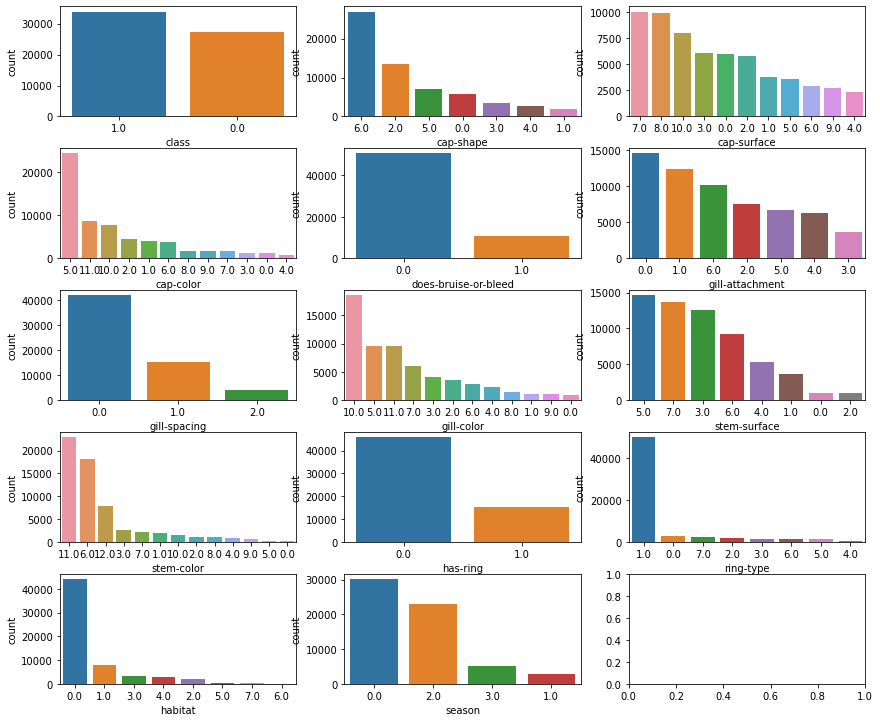

In [143]:
fig, axes = plt.subplots(5, 3, figsize=(12,10))
fig.tight_layout()

#create chart in each subplot
sns.countplot(data=mushroom_imputed_df, x='class', order=mushroom_imputed_df['class'].value_counts().index, ax=axes[0,0])
sns.countplot(data=mushroom_imputed_df, x='cap-shape', order=mushroom_imputed_df['cap-shape'].value_counts().index, ax=axes[0,1])
sns.countplot(data=mushroom_imputed_df, x='cap-surface', order=mushroom_imputed_df['cap-surface'].value_counts().index, ax=axes[0,2])
sns.countplot(data=mushroom_imputed_df, x='cap-color', order=mushroom_imputed_df['cap-color'].value_counts().index, ax=axes[1,0])
sns.countplot(data=mushroom_imputed_df, x='does-bruise-or-bleed', order=mushroom_imputed_df['does-bruise-or-bleed'].value_counts().index, ax=axes[1,1])
sns.countplot(data=mushroom_imputed_df, x='gill-attachment', order=mushroom_imputed_df['gill-attachment'].value_counts().index, ax=axes[1,2])
sns.countplot(data=mushroom_imputed_df, x='gill-spacing', order=mushroom_imputed_df['gill-spacing'].value_counts().index, ax=axes[2,0])
sns.countplot(data=mushroom_imputed_df, x='gill-color', order=mushroom_imputed_df['gill-color'].value_counts().index, ax=axes[2,1])
sns.countplot(data=mushroom_imputed_df, x='stem-surface', order=mushroom_imputed_df['stem-surface'].value_counts().index, ax=axes[2,2])
sns.countplot(data=mushroom_imputed_df, x='stem-color', order=mushroom_imputed_df['stem-color'].value_counts().index, ax=axes[3,0])
sns.countplot(data=mushroom_imputed_df, x='has-ring', order=mushroom_imputed_df['has-ring'].value_counts().index, ax=axes[3,1])
sns.countplot(data=mushroom_imputed_df, x='ring-type', order=mushroom_imputed_df['ring-type'].value_counts().index, ax=axes[3,2])
sns.countplot(data=mushroom_imputed_df, x='habitat', order=mushroom_imputed_df['habitat'].value_counts().index, ax=axes[4,0])
sns.countplot(data=mushroom_imputed_df, x='season', order=mushroom_imputed_df['season'].value_counts().index, ax=axes[4,1])



In [162]:
# Check to make sure imputation worked; Percent missing should be 0
for column in mushroom_imputed_df.columns:
    print(column, ": ", len(np.array(np.where(pd.isnull(mushroom_imputed_df[column])))[0])*100 /  mushroom.shape[0] )

cap-diameter :  0.0
stem-height :  0.0
stem-width :  0.0
class :  0.0
cap-shape :  0.0
cap-surface :  0.0
cap-color :  0.0
does-bruise-or-bleed :  0.0
gill-attachment :  0.0
gill-spacing :  0.0
gill-color :  0.0
stem-surface :  0.0
stem-color :  0.0
has-ring :  0.0
ring-type :  0.0
habitat :  0.0
season :  0.0


### Penalized Logistic Regression

In [4]:
# Import imputed and label encoded mushroom data
mushroom_imp = pd.read_csv("mushroom_imputed_encoded.csv", sep=',')

In [6]:
mushroom_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   stem-height           61069 non-null  float64
 3   stem-width            61069 non-null  float64
 4   class                 61069 non-null  float64
 5   cap-shape             61069 non-null  float64
 6   cap-surface           61069 non-null  float64
 7   cap-color             61069 non-null  float64
 8   does-bruise-or-bleed  61069 non-null  float64
 9   gill-attachment       61069 non-null  float64
 10  gill-spacing          61069 non-null  float64
 11  gill-color            61069 non-null  float64
 12  stem-surface          61069 non-null  float64
 13  stem-color            61069 non-null  float64
 14  has-ring              61069 non-null  float64
 15  ring-type          

### Convert numeric levels back to letters. For kNN imputation, numeric values were assigned to levels in alphabetical order (based on the values assigned to the abbreviations; see data dictionary). 

In [5]:
cap_shape_map = {0:'bell', 1:'conical', 2:'flat', 3:'others', 4:'spherical', 5:'sunken', 6:'convex'}
cap_surface_map = {0:'fleshy', 1:'fibrous', 2:'grooves', 3:'shiny', 4:'silky', 5:'leathery', 6:'sticky', 7:"smooth", 
                  8:'sticky', 9:'wrinkled', 10:'scaly'}
cap_color = {0:'buff', 1:'red', 2:'gray', 3:'black', 4:'blue', 5:'brown',6:'orange', 7:'pink', 8:'green', 9:'purple',
            10:'white', 11:'yellow'}
bruise_or_bleed_map = {0:'F', 1:'T'}
gill_attach_map = {0:'adnate', 1:'decurrent', 2:'free', 3:'none', 4:'pores', 5:'sinuate', 6:'adnexed'}
gill_spacing_map = {0:'close', 1:'distant', 2:'none'}
gill_color_map = {0:'buff', 1:'red', 2:'none', 3:'gray', 4:'black', 5:'blue',6:'brown', 7:'orange', 8:'pink', 9:'green',
            10:'purple', 11:'white'}
stem_surface_map = {0:'none', 1:'grooves', 2:'shiny', 3:'fibrous', 4:'silky', 5:'smooth', 6:'sticky', 7:'scaly'}
stem_color_map = {0:'buff', 1:'red', 2:'none', 3:'gray', 4:'black', 5:'blue', 6:'brown', 7:'orange', 8:'pink', 9:'green',
                  10:'purple', 11:'white', 12:'yellow'}
has_ring_map = {0:'F', 1:'T'}
ring_type_map = {0:'evanescent', 1:'none', 2:'grooved', 3:'large', 4:'movable', 5:'pendant', 6:'flaring', 7:'zone'}
habitat_map = {0:'woods', 1:'grasses', 2:'heaths', 3:'leaves', 4:'meadows', 5:'paths', 6:'urban', 7:'waste'}
season_map = {0:'autumn', 1:'spring', 2:'summer', 3:'winter'}

mappings = [cap_shape_map, cap_surface_map, cap_color, bruise_or_bleed_map, gill_attach_map, gill_spacing_map, 
            gill_color_map, stem_surface_map, stem_color_map, has_ring_map, ring_type_map, habitat_map, season_map]

columns_to_cat = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
                 'gill-color', 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

for col in columns_to_cat:
    mushroom_imp[col] = mushroom_imp[col].map(mappings[columns_to_cat.index(col)])

### Dummy Encode: Create Binary Indicator Columns

In [6]:
prefix_names = {'cap-shape':'cap-shape', 'cap-surface':'cap-surface', 'cap-color':'cap-color',
                'does-bruise-or-bleed':'does-bruise-or-bleed', 'gill-attachment':'gill-attachment', 
                'gill-spacing':'gill-spacing','gill-color':'gill-color', 'stem-surface':'stem-surface',
                'stem-color':'stem-color', 'has-ring':'has-ring',  'ring-type':'ring-type', 'habitat':'habitat',
                'season':'season'}
mushroom_dummy = pd.get_dummies(mushroom_imp, prefix= prefix_names, drop_first = True)

In [7]:
mushroom_dummy = mushroom_dummy.drop('Unnamed: 0', axis=1)

In [9]:
mushroom_dummy.head()

,cap-diameter,stem-height,stem-width,class,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_others,cap-shape_spherical,cap-shape_sunken,...,habitat_heaths,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_spring,season_summer,season_winter
0,15.26,16.95,17.09,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,16.60,17.99,18.19,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,14.07,17.80,17.74,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,14.17,15.77,15.98,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,14.64,16.53,17.20,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [8]:
X = mushroom_dummy.drop('class', axis=1)
y = mushroom_dummy['class']

In [9]:
# class = 1 (Poisonous) was the most frequently occuring class. 
no_info_rate = len(np.array(np.where(y == 1))[0])*100/len(y)
print("No Information Rate: %5.3f" % (no_info_rate),"%")

No Information Rate: 55.491 %


### Training and test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/3), random_state=1)

### Tune/Fit Logistic Regression

In [11]:
MyLogisticRegression = LogisticRegressionCV(random_state=0, cv=10, class_weight = 'balanced',solver="liblinear", scoring="recall") 
# default: L2 (Ridge) penalty with penalty parameter C=1.0
MyLogisticRegression.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=0,
                     scoring='recall', solver='liblinear')

In [12]:
MyLogisticRegression.scores_[1]

for i in range(len(MyLogisticRegression.Cs_)):
    C = MyLogisticRegression.Cs_[i]
    mean_score = np.mean(MyLogisticRegression.scores_[1][i])
    print(C, ": ", mean_score)

0.0001 :  0.7396193005754759
0.000774263682681127 :  0.727003098716246
0.005994842503189409 :  0.7448627103631533
0.046415888336127774 :  0.7492028343666961
0.3593813663804626 :  0.7418954827280779
2.782559402207126 :  0.7491585473870683
21.54434690031882 :  0.7319309123117803
166.81005372000558 :  0.7345438441098316
1291.5496650148827 :  0.7248007085916741
10000.0 :  0.745349867139061


### Predict on test data for model evaluation

In [13]:
# Predicted probability of being poisonous
Logistic_predprobs = MyLogisticRegression.predict_proba(X_test)[:,1]

# Predicted class (1 = Poisonous)
Logistic_pred_class = MyLogisticRegression.predict(X_test)

### Evaluate model

In [16]:
conf_matrix = confusion_matrix(y_test, Logistic_pred_class)
conf_matrix

array([[7272, 1779],
       [2783, 8523]], dtype=int64)

In [17]:
# Accuracy
accuracy = MyLogisticRegression.score(X_test, y_test)*100
precision = conf_matrix[0,0]/(conf_matrix[0,1]+conf_matrix[0,0])*100
recall = conf_matrix[0,0]/(conf_matrix[1,0]+conf_matrix[0,0])*100
F = 2*precision*recall/100**2 / (precision/100 + recall/100)
print("Accuracy: %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("F: %.5f" % F)

Accuracy: 75.385
Precision: 80.345
Recall: 72.322
F: 0.76123


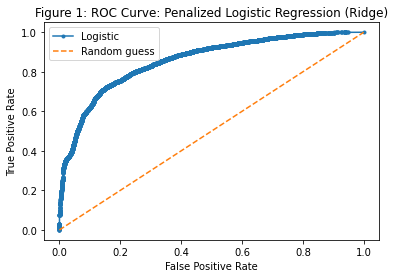

In [18]:
ns_probs = [0 for _ in range(len(y_test))]

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, Logistic_predprobs) # Logistic Regression
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs) # Random guess

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title("Figure 1: ROC Curve: Penalized Logistic Regression (Ridge)")
plt.savefig('books_read.png')
plt.show()


In [19]:
# AUC scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Logistic_predprobs)
print('Random guess: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Random guess: ROC AUC=0.500
Logistic: ROC AUC=0.858


In [20]:
Logistic_predprobs_df = pd.DataFrame(Logistic_predprobs).rename(columns={0:'PredictedProbs'})
Logistic_pred_class_df = pd.DataFrame(Logistic_pred_class).rename(columns={0:'PredictedClass'})
pdtest = pd.DataFrame(y_test)

results_test = pd.concat((Logistic_predprobs_df, Logistic_pred_class_df, 
                          pdtest.reset_index().drop('index', axis=1).rename(columns={'class':'True Class'})), axis=1)

In [21]:
results_test['True Class'] = results_test['True Class'].map({0:'Edible', 1:'Poisonous'})
results_test['PredictedClass'] = results_test['PredictedClass'].map({0:'Edible', 1:'Poisonous'})

In [22]:
results_test.head()

,PredictedProbs,PredictedClass,True Class
0,0.651875,Poisonous,Edible
1,0.230492,Edible,Edible
2,0.536921,Poisonous,Poisonous
3,0.454769,Edible,Poisonous
4,0.104819,Edible,Edible


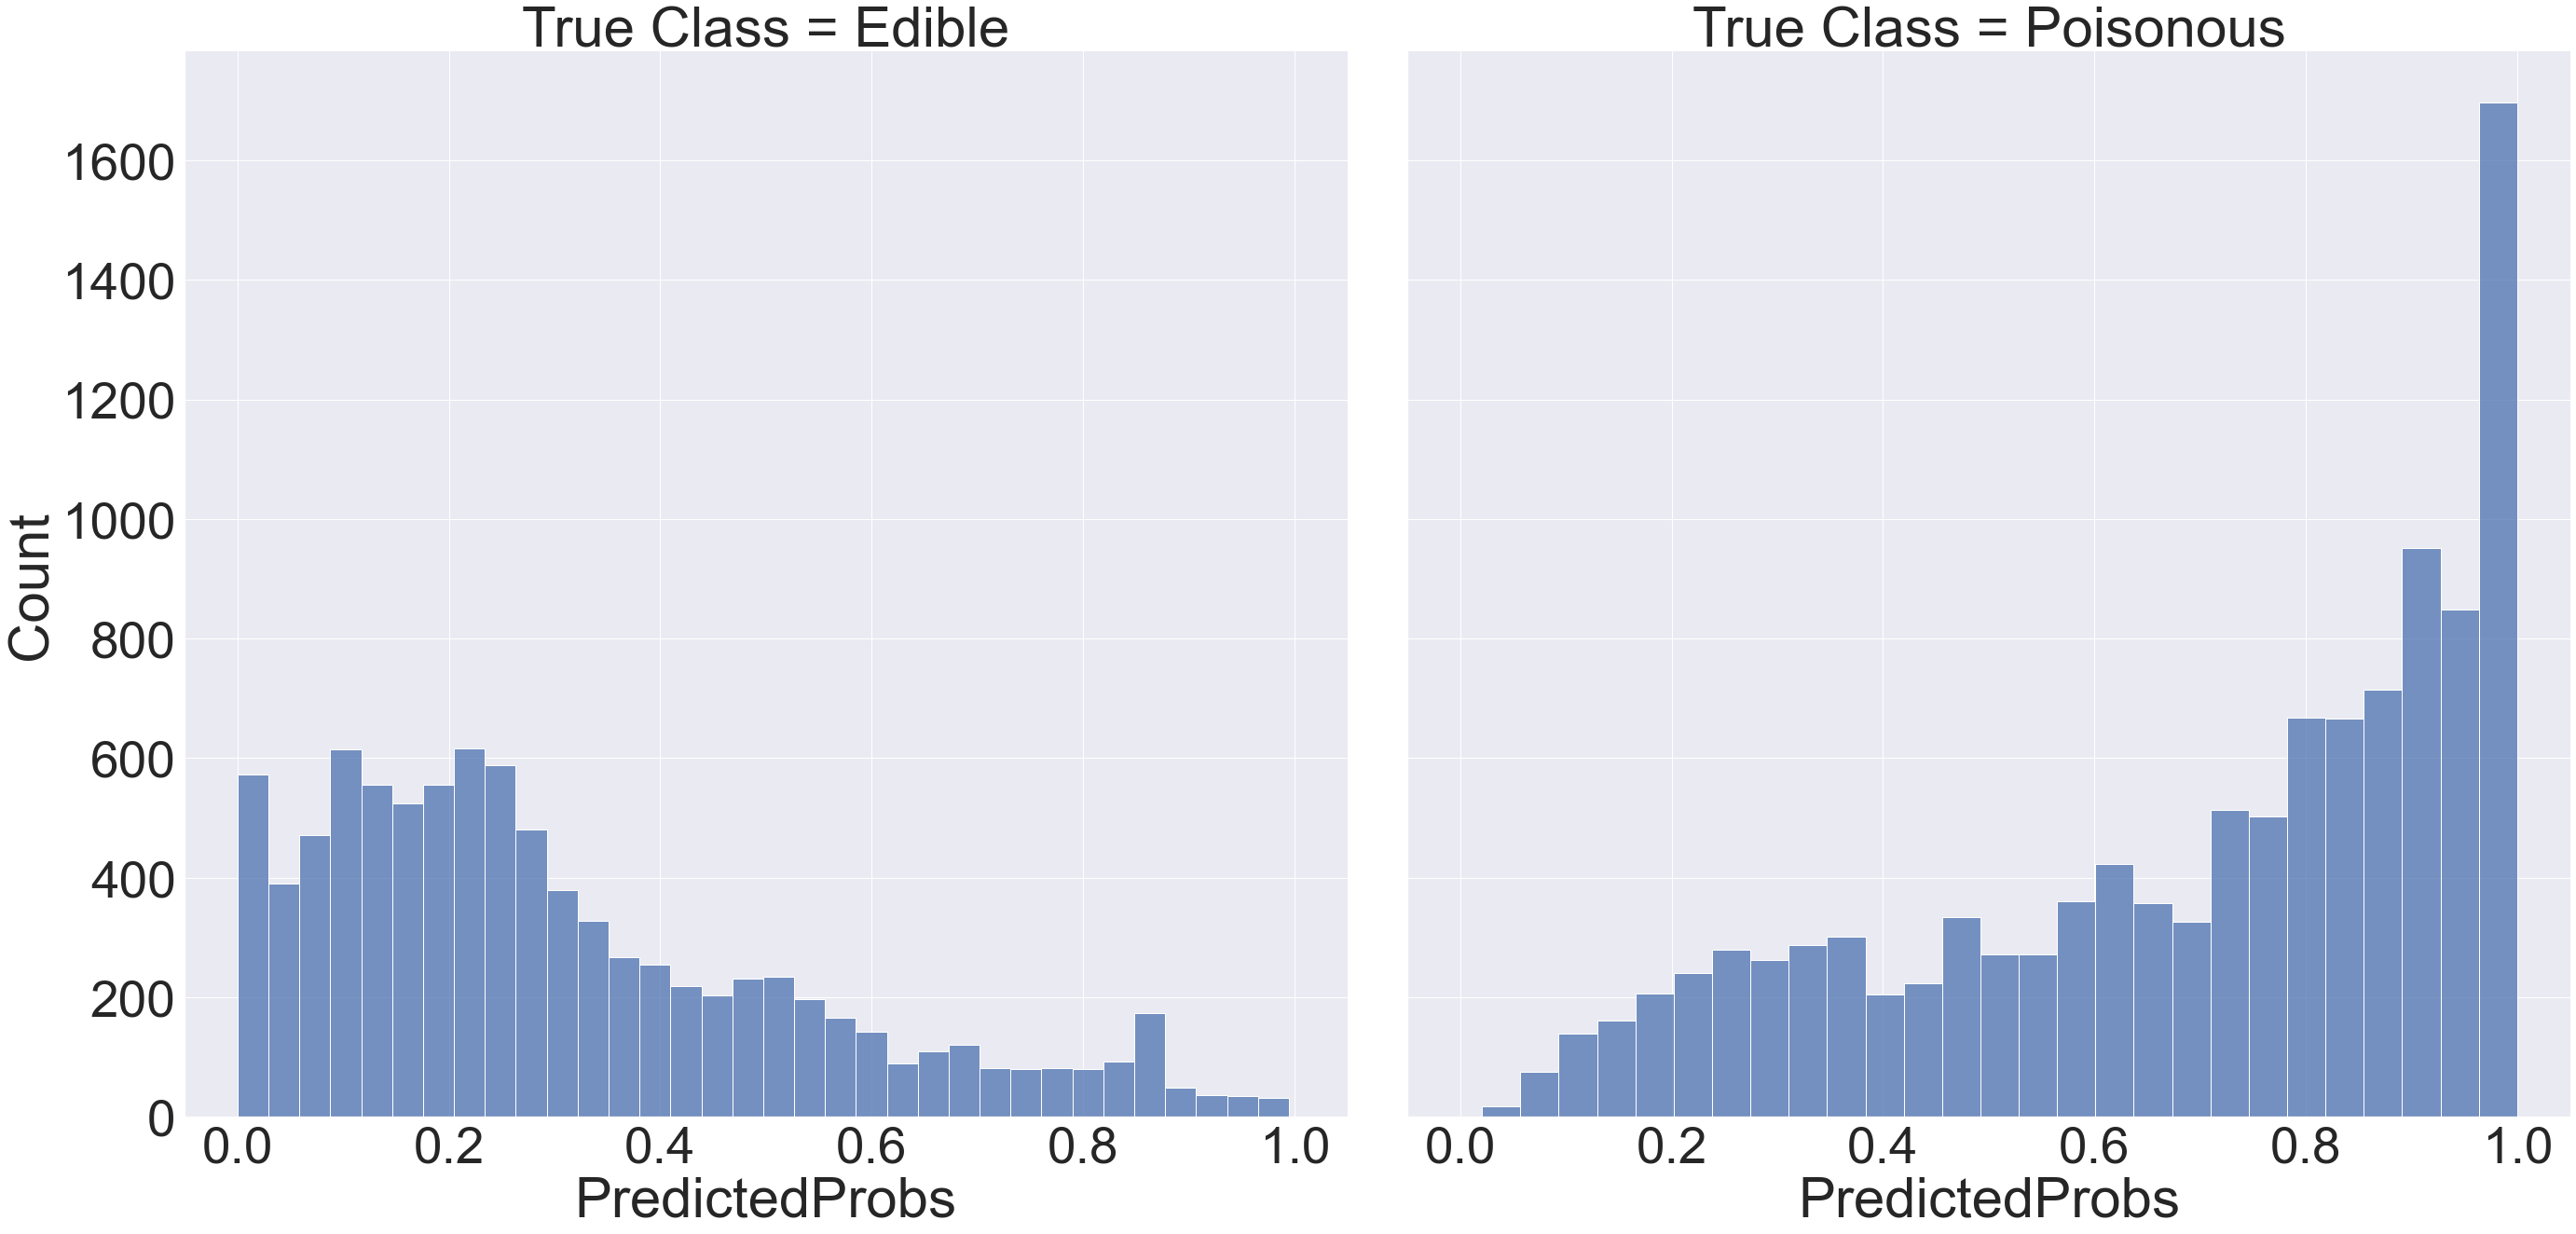

In [24]:
sns.set(font_scale = 5)
g = sns.FacetGrid(results_test, col="True Class", height=20)
g.map_dataframe(sns.histplot, x="PredictedProbs")
plt.savefig('facethist.png')


## Clustering

### Create Principal Components for visualization

In [27]:
# Scale Data
scaler = StandardScaler()
scaler.fit(X_test)
mush_scaled = scaler.transform(X_test)

# Reduce dimensions using PCA
pca = PCA(n_components = 2)
mush_pca = pca.fit_transform(mush_scaled)

In [28]:
pca.explained_variance_ratio_

array([0.05799805, 0.04684243])

In [29]:
agg = AgglomerativeClustering(n_clusters=2,linkage='ward')
assignment = agg.fit(mush_scaled)
y_pred_agg = assignment.labels_

In [30]:
# Create DataFrame
mush_pca_df = pd.DataFrame(mush_pca).rename(columns={0:'Component 1', 1:'Component 2'})
mush_pca_clusters = pd.concat((mush_pca_df, pd.DataFrame(y_pred_agg).rename(columns={0:'Hierarchical'}), 
                              pdtest.reset_index().drop('index', axis=1).rename(columns={'class':'True Class'})),axis=1)
mush_pca_clusters['True Class'] = mush_pca_clusters['True Class'].map({0:'Edible', 1:'Poisonous'})

In [131]:
mush_pca_clusters.head()

,Component 1,Component 2,Hierarchical,True Class
0,0.319464,-2.605741,0,Edible
1,0.578302,0.447104,0,Edible
2,0.562142,-2.057491,0,Poisonous
3,-1.249814,-0.199341,0,Poisonous
4,-0.511075,-1.353890,0,Edible


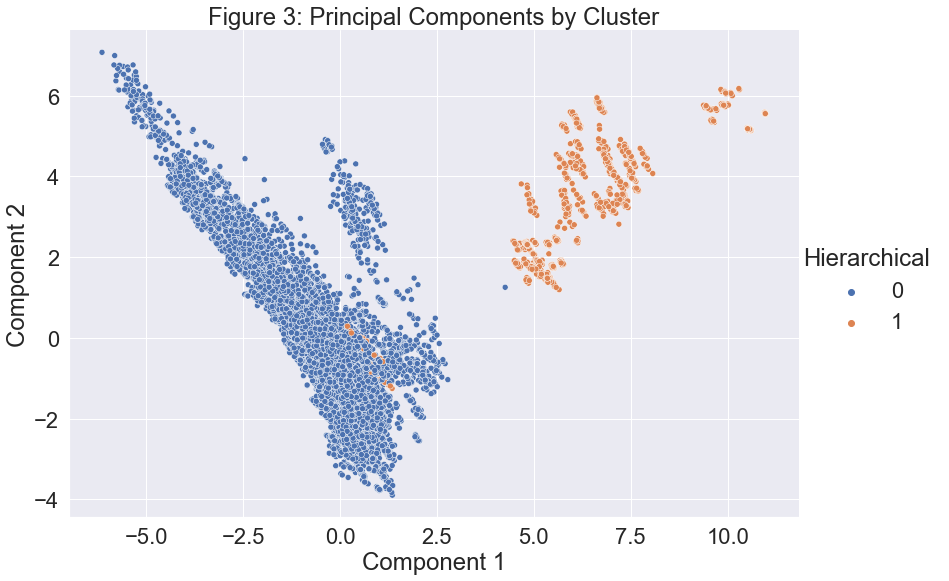

In [31]:
sns.set(font_scale = 2)
sns.relplot(x="Component 1", y="Component 2", hue="Hierarchical", data=mush_pca_clusters, height=8.27, aspect=11.7/8.27).set(title="Figure 3: Principal Components by Cluster")
plt.savefig('PC_by_cluster.png')

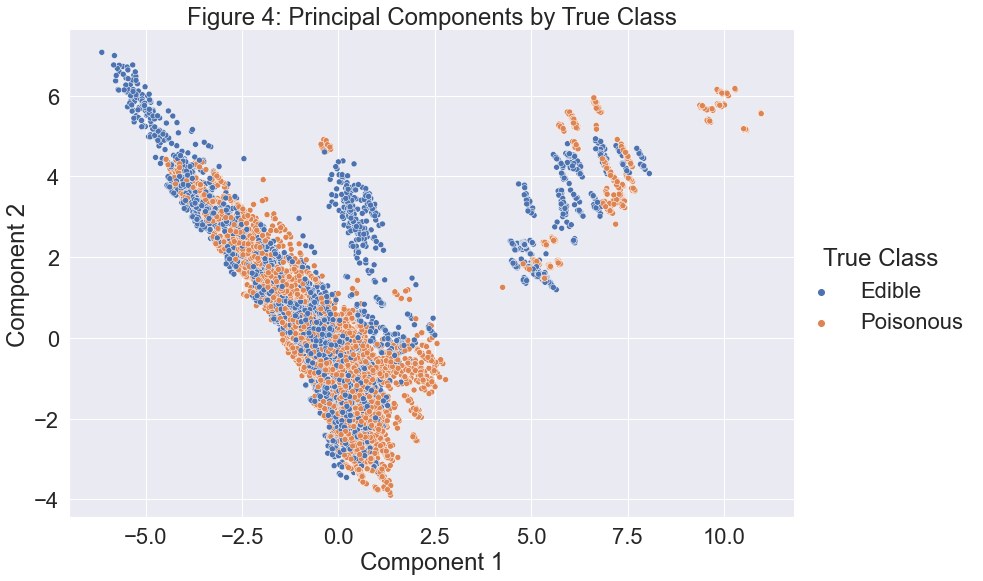

In [33]:
sns.relplot(x="Component 1", y="Component 2", hue="True Class", data=mush_pca_clusters, height=8.27, 
            aspect=11.7/8.27).set(title="Figure 4: Principal Components by True Class")
plt.savefig('PC_by_Class.png')

### Observe counts to assess correlation between cluster and outcome

In [135]:
print(len(np.array(np.where((mush_pca_clusters['Hierarchical'] == 0 )& (mush_pca_clusters['True Class'] == 'Edible')))[0]))
print(len(np.array(np.where((mush_pca_clusters['Hierarchical'] == 1 )& (mush_pca_clusters['True Class'] == 'Edible')))[0]))
print(len(np.array(np.where((mush_pca_clusters['Hierarchical'] == 0 )& (mush_pca_clusters['True Class'] == 'Poisonous')))[0]))
print(len(np.array(np.where((mush_pca_clusters['Hierarchical'] == 1 )& (mush_pca_clusters['True Class'] == 'Poisonous')))[0]))

8580
471
10400
906
